<a href="https://www.kaggle.com/code/fethullahceviz/kagglesurveydata?scriptVersionId=108060166" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/kaggle-survey-2022/kaggle_survey_2022_responses.csv
/kaggle/input/kaggle-survey-2022/Supplementary Data/kaggle_survey_2022_methodology.pdf
/kaggle/input/kaggle-survey-2022/Supplementary Data/kaggle_survey_2022_answer_choices.pdf


In [2]:
df=pd.read_csv('/kaggle/input/kaggle-survey-2022/kaggle_survey_2022_responses.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df=df[1:]

In [4]:
df.head(3)


,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN


In [5]:
df.dtypes

Duration (in seconds)    object
Q2                       object
Q3                       object
Q4                       object
Q5                       object
                          ...  
Q44_8                    object
Q44_9                    object
Q44_10                   object
Q44_11                   object
Q44_12                   object
Length: 296, dtype: object

In [6]:
df.isnull().sum()

Duration (in seconds)        0
Q2                           0
Q3                           0
Q4                           0
Q5                           0
                         ...  
Q44_8                    16231
Q44_9                    20193
Q44_10                   22271
Q44_11                   22729
Q44_12                   23162
Length: 296, dtype: int64

In [7]:
df=df[1:]

In [8]:
def column_name(name):
    return [col for col in df.columns if name in col]

In [9]:
def data_vis(data):
    listem =[]
    for i in data.columns:
        listem.append(df[i].dropna().unique()[0])
    data = data.replace(np.nan,0).replace(listem,1)
    data.set_axis(listem, axis='columns', inplace=True)
    df_x=pd.DataFrame(data.sum(), columns=['count'])
    df_x.sort_values(by='count', ascending=True, inplace=True)
    return df_x

In [10]:
def data_vis_son(question, titl):
    dt_v = data_vis(df[column_name(question)])
    ax   = dt_v.plot(kind='barh',color=[0.4940, 0.1840, 0.5560], figsize=(12,6) ,title= titl)

    for c in ax.containers:
        # set the bar label
        ax.bar_label(c, fmt='%.0f', label_type='edge')

In [11]:
def count_plot(data):
    return sns.countplot(y=data, order=data.value_counts().index)

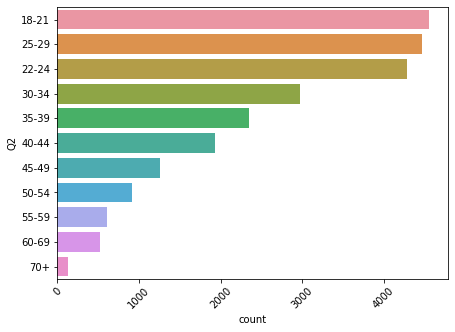

In [12]:
#Q2 What is your age (# years)?
plt.figure(figsize=(7,5))

count_plot(df.Q2)
plt.xticks(rotation=45)
None

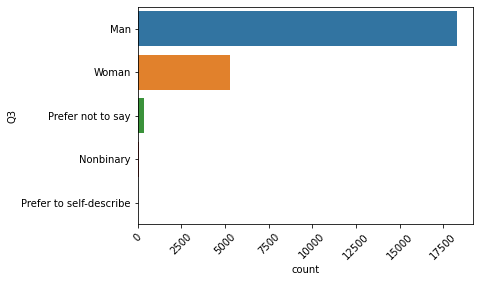

In [13]:
#Q3 What is your gender?
count_plot(df.Q3)
plt.xticks(rotation=45)
None

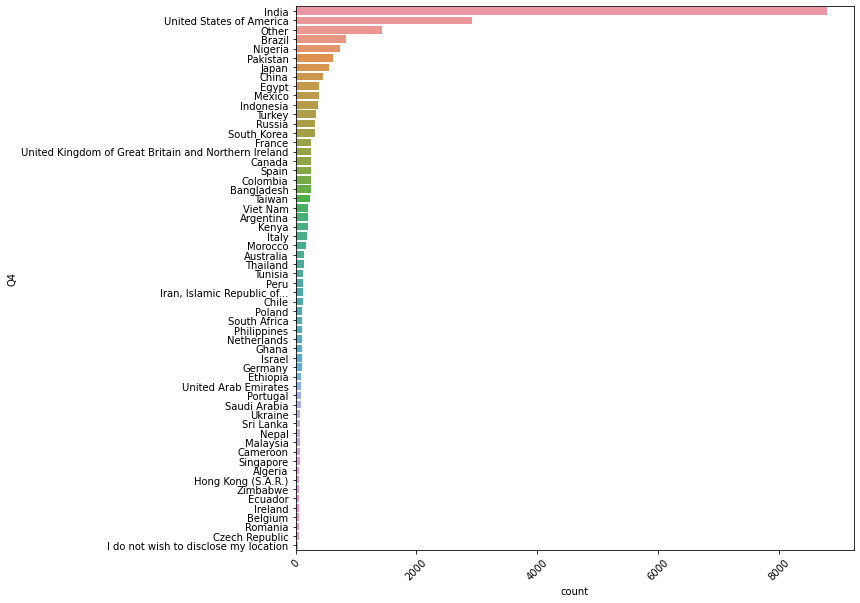

In [14]:
#Q4 In which country do you currently reside?
plt.figure(figsize=(10,10))
count_plot(df.Q4)
plt.xticks(rotation=45)
None

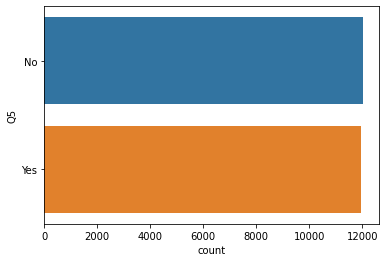

In [15]:
#Q5 Are you currently a student? (high school, university, or graduate)
count_plot(df.Q5)
plt.xticks(rotation=0)
None

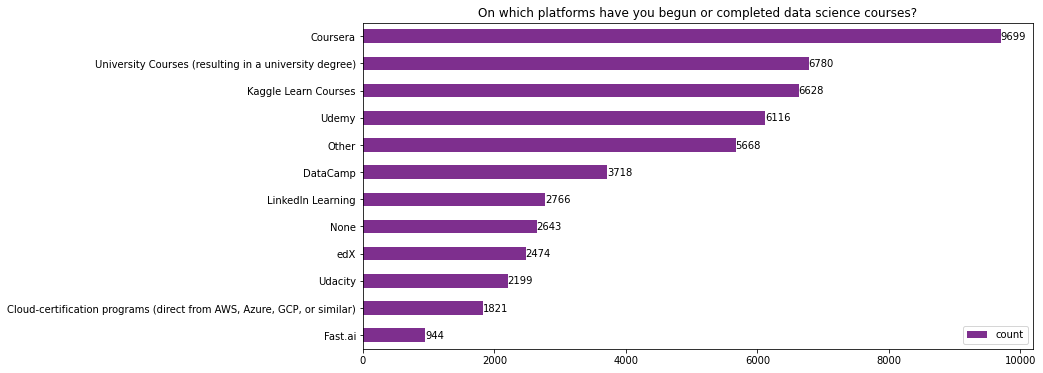

In [16]:
#Q6
data_vis_son("Q6_" ,'On which platforms have you begun or completed data science courses?')

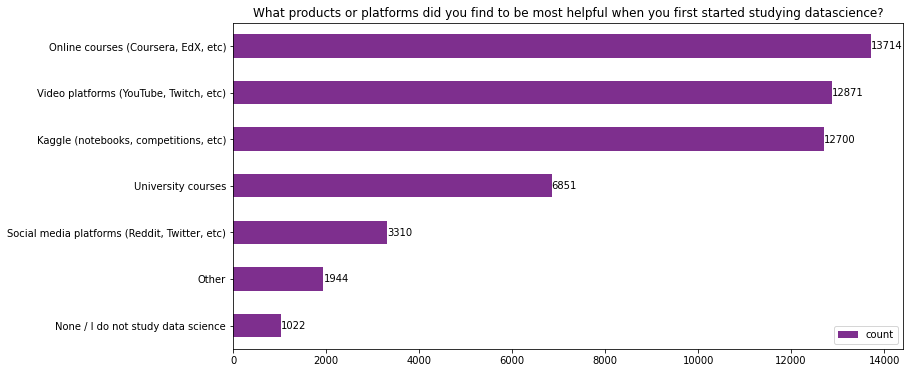

In [17]:
#Q7
data_vis_son("Q7_" ,'What products or platforms did you find to be most helpful when you first started studying datascience?')

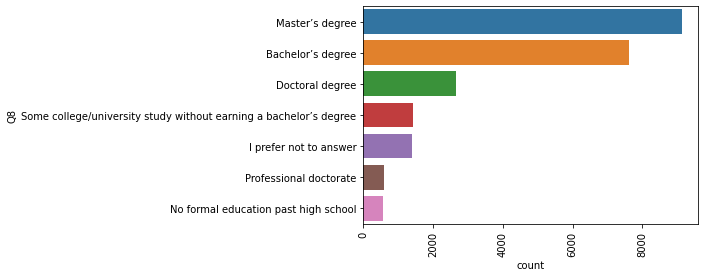

In [18]:
#Q8 What is the highest level of formal education that you have attained or plan to attain within the next 2years?
count_plot(df.Q8)
plt.xticks(rotation=90)
None

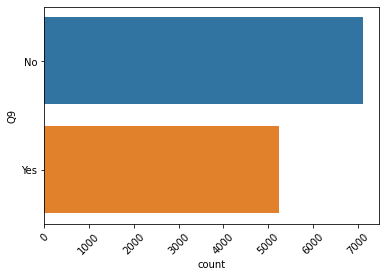

In [19]:
#Q9 Have you ever published any academic research (papers, preprints, conference proceedings, etc)?
count_plot(df.Q9)
plt.xticks(rotation=45)
None

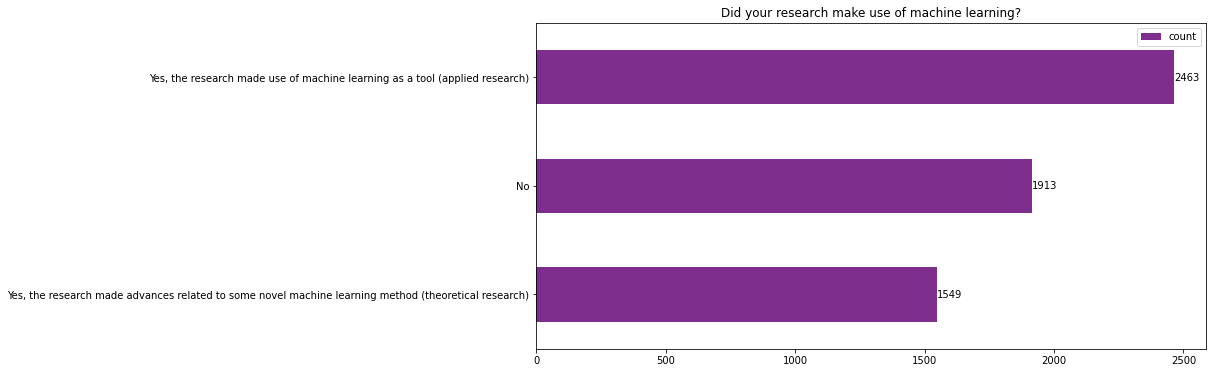

In [20]:
#Q10
data_vis_son("Q10_" ,'Did your research make use of machine learning?')

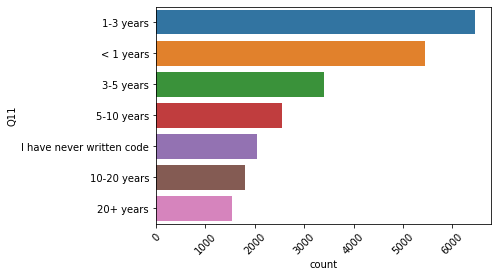

In [21]:
#Q11 For how many years have you been writing code and/or programming?
count_plot(df.Q11)
plt.xticks(rotation=45)
None

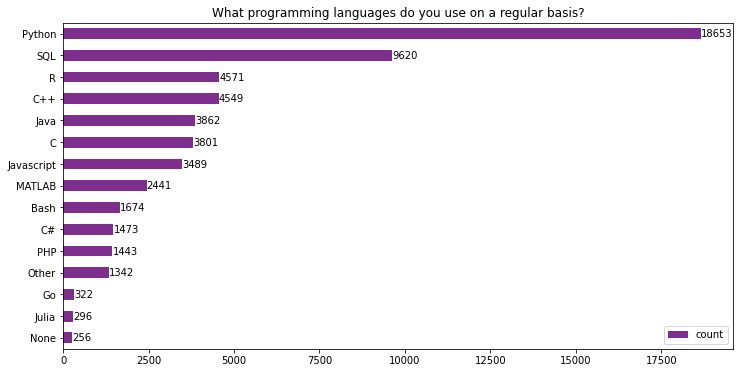

In [22]:
#Q12
data_vis_son("Q12_" ,'What programming languages do you use on a regular basis?')

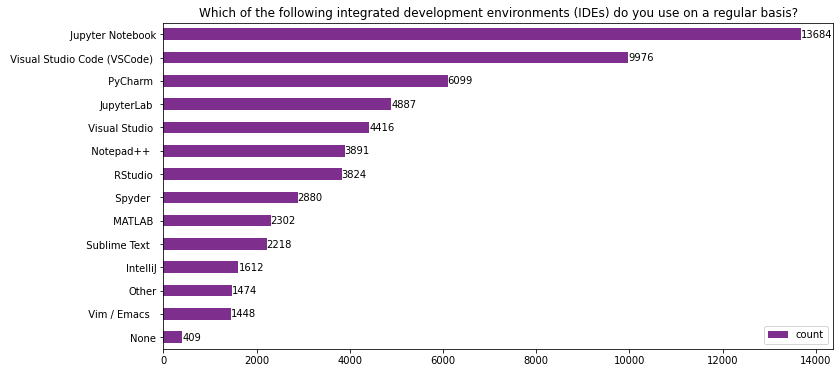

In [23]:
#Q13
data_vis_son("Q13_" ,'Which of the following integrated development environments (IDEs) do you use on a regular basis?')

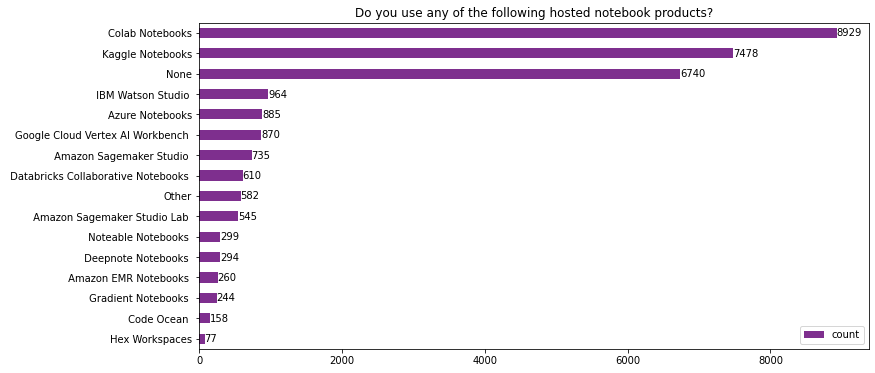

In [24]:
#Q14
data_vis_son("Q14_" ,'Do you use any of the following hosted notebook products?')

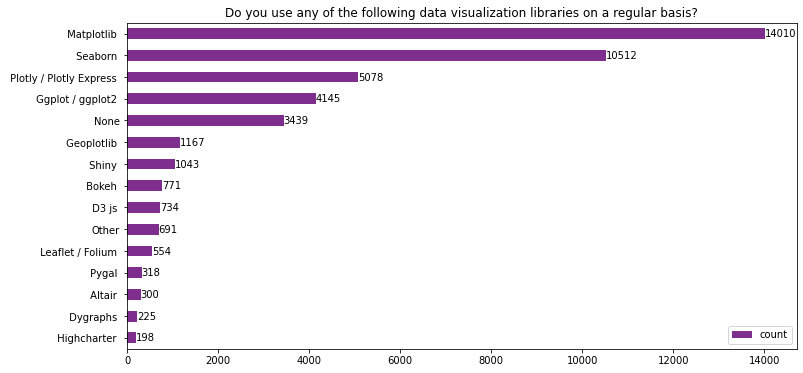

In [25]:
#Q15
data_vis_son("Q15_" ,'Do you use any of the following data visualization libraries on a regular basis?')

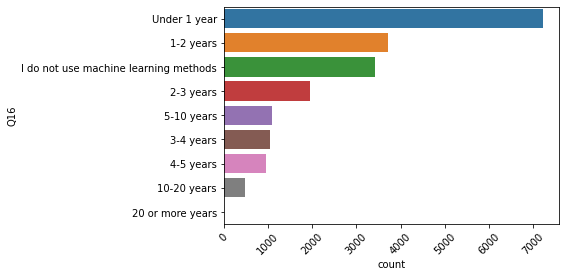

In [26]:
#Q16 For how many years have you used machine learning methods?
count_plot(df.Q16)
plt.xticks(rotation=45)
None

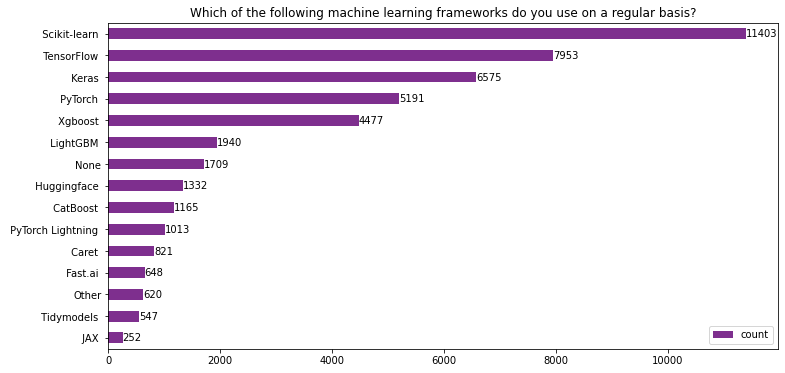

In [27]:
#Q17
data_vis_son("Q17_" ,'Which of the following machine learning frameworks do you use on a regular basis?')

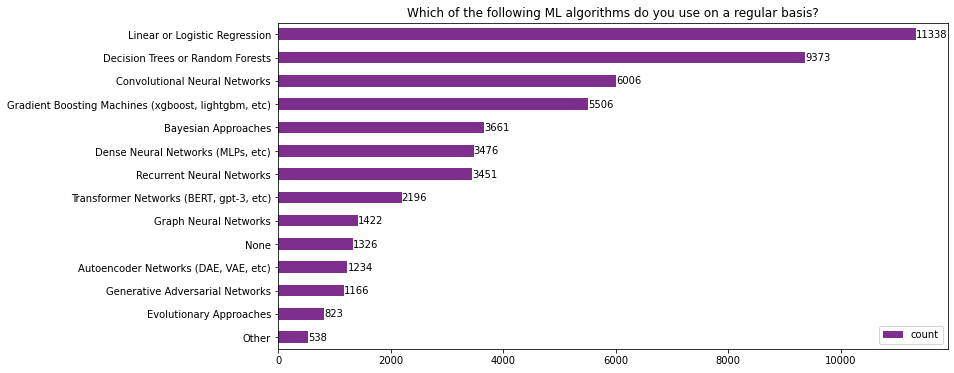

In [28]:
#Q18
data_vis_son("Q18_" ,'Which of the following ML algorithms do you use on a regular basis?')

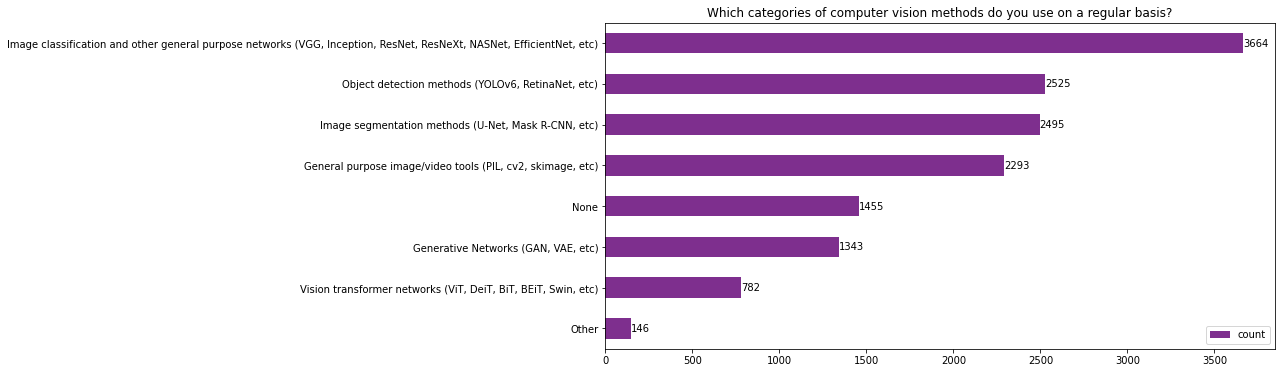

In [29]:
#Q19
data_vis_son("Q19_" ,'Which categories of computer vision methods do you use on a regular basis?')

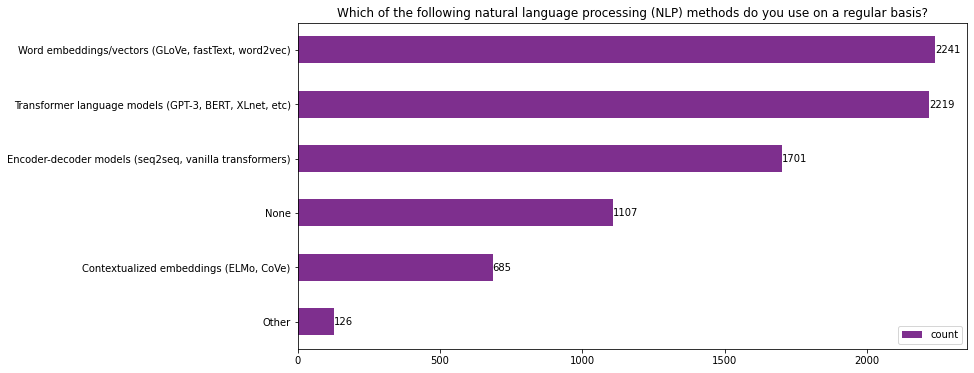

In [30]:
#Q20
data_vis_son("Q20_" ,'Which of the following natural language processing (NLP) methods do you use on a regular basis?')

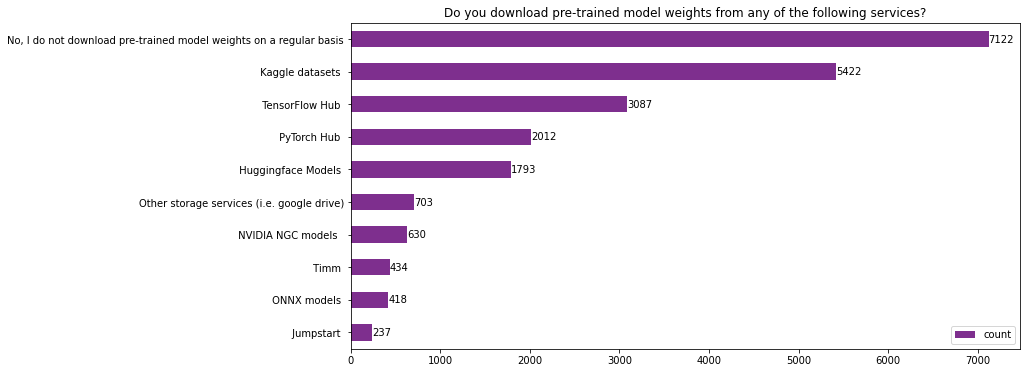

In [31]:
#Q21
data_vis_son("Q21_" ,'Do you download pre-trained model weights from any of the following services?')

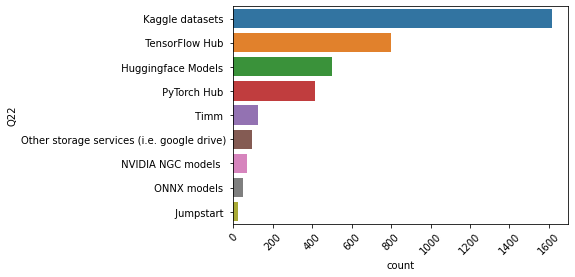

In [32]:
#Q22 Which of the following ML model hubs/repositories do you use most often?
count_plot(df.Q22)
plt.xticks(rotation=45)
None

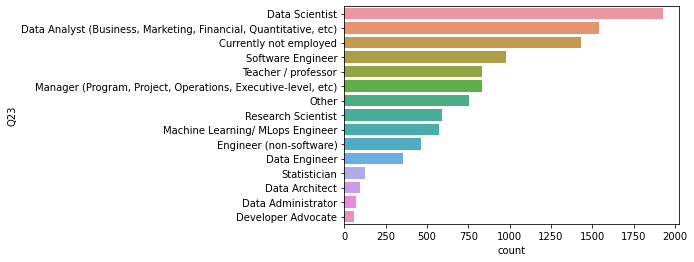

In [33]:
#Q23 Select the title most similar to your current role (or most recent title if retired):
count_plot(df.Q23)
plt.xticks(rotation=0)
None

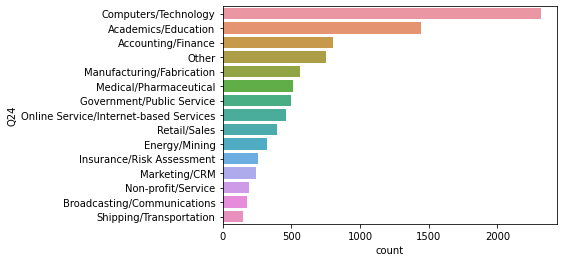

In [34]:
#Q24 In what industry is your current employer/contract (or your most recent employer if retired)?
count_plot(df.Q24)
plt.xticks(rotation=0)
None

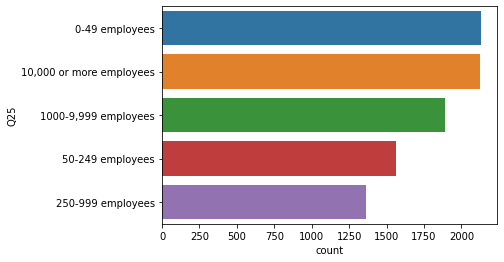

In [35]:
#Q25 What is the size of the company where you are employed?
count_plot(df.Q25)
plt.xticks(rotation=0)
None

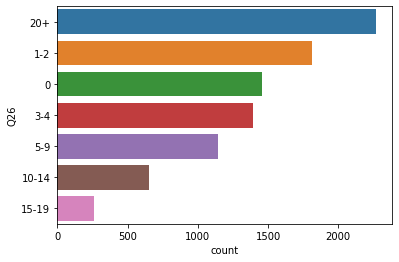

In [36]:
#Q26 Approximately how many individuals are responsible for data science workloads at your place of business?
count_plot(df.Q26)
plt.xticks(rotation=0)
None

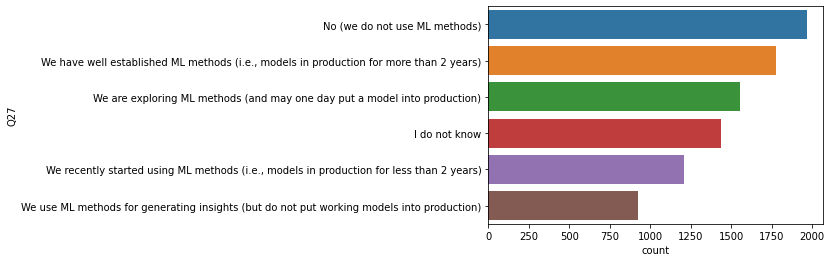

In [37]:
#Q27 Does your current employer incorporate machine learning methods into their business?

count_plot(df.Q27)
plt.xticks(rotation=0)
None

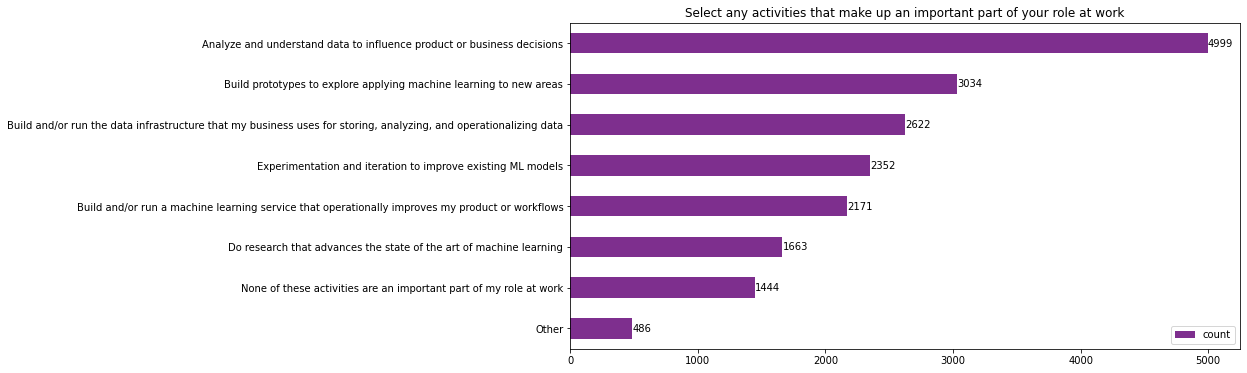

In [38]:
#Q28
data_vis_son("Q28_" ,'Select any activities that make up an important part of your role at work')

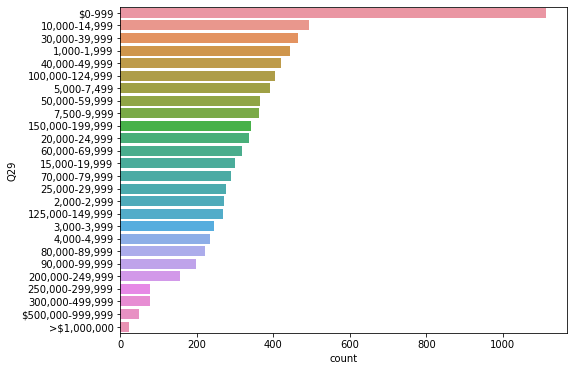

In [39]:
#Q29 What is your current yearly compensation (approximate $USD)?
plt.figure(figsize=(8,6))
count_plot(df.Q29)
plt.xticks(rotation=0)
None

In [40]:
df['Q29']=df['Q29'].str.replace('$','').str.replace(',','').str.replace('>','1000000-')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [41]:
df[['Sal_1', 'Sal_2']]=df['Q29'].str.split('-',n=1, expand=True)
df['Sal_1']=pd.to_numeric(df['Sal_1'])
df['Sal_2']=pd.to_numeric(df['Sal_2'])
df['Salary']=round((df['Sal_1'] + df['Sal_2']) / 2)
df.drop(["Sal_1","Sal_2"], axis=1, inplace=True)

In [42]:
df['Salary'].describe().T

count       8136.000000
mean       56449.145772
std        99250.025907
min          500.000000
25%         3500.000000
50%        22500.000000
75%        75000.000000
max      1000000.000000
Name: Salary, dtype: float64

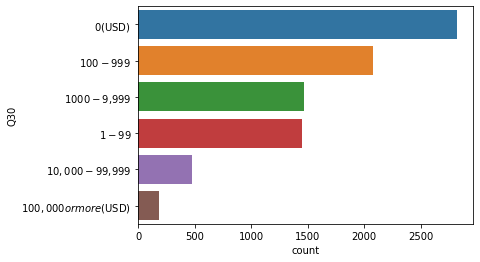

In [43]:
#Q30 Approximately how much money have you spent on machine learning and/or cloud computing
#    services at home or at work in the past 5 years (approximate $USD)?
count_plot(df.Q30)
plt.xticks(rotation=0)
None

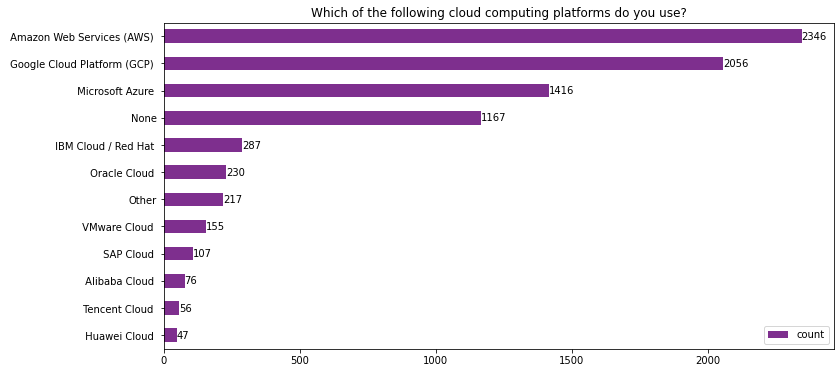

In [44]:
#Q31
data_vis_son("Q31_" ,'Which of the following cloud computing platforms do you use?')

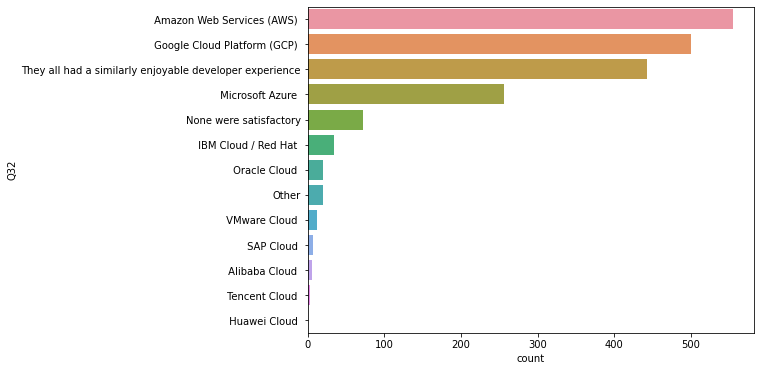

In [45]:
#Q32 Of the cloud platforms that you are familiar with, which has the best developer experience (mostenjoyable to use)?
plt.figure(figsize=(8,6))
count_plot(df.Q32)
plt.xticks(rotation=0)
None

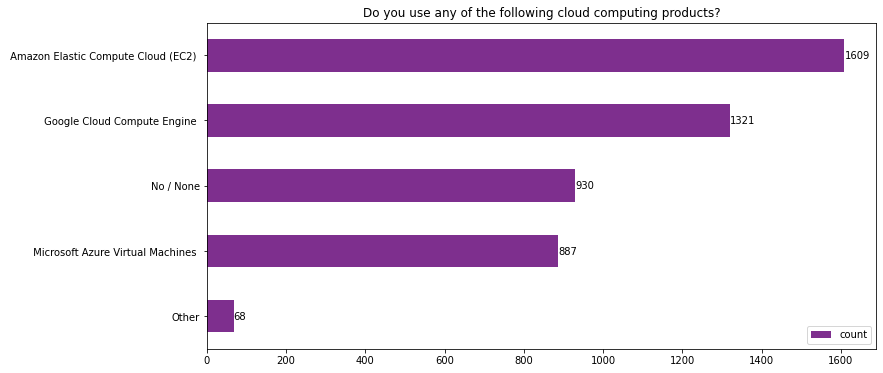

In [46]:
#Q33
data_vis_son("Q33" ,'Do you use any of the following cloud computing products?')

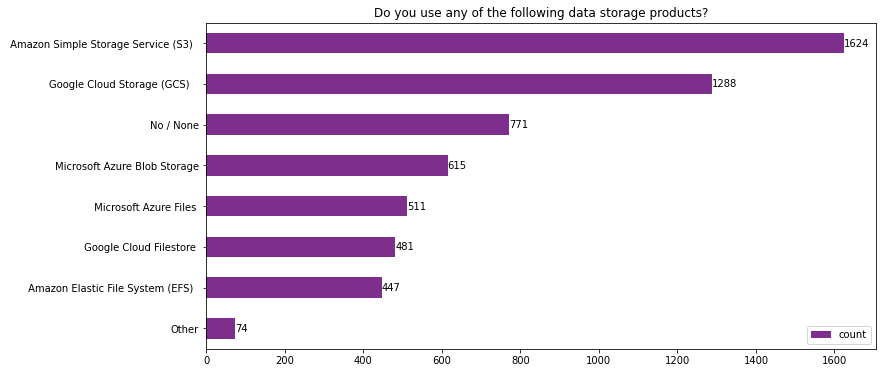

In [47]:
#Q34
data_vis_son("Q34_" ,'Do you use any of the following data storage products?')

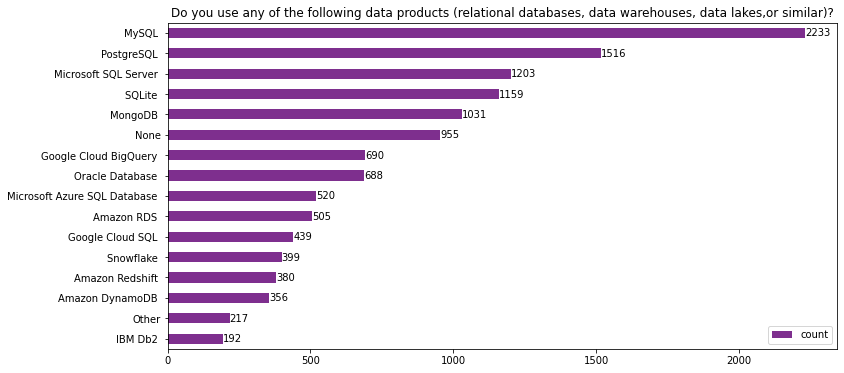

In [48]:
#Q35
data_vis_son("Q35_" ,'Do you use any of the following data products (relational databases, data warehouses, data lakes,or similar)?')

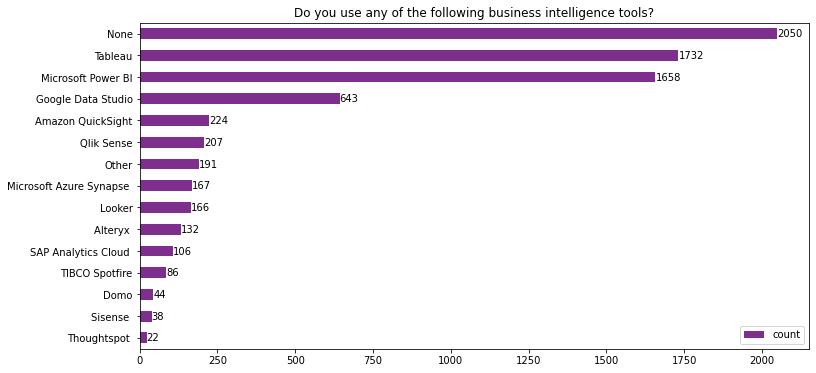

In [49]:
#Q36
data_vis_son("Q36_" ,'Do you use any of the following business intelligence tools?')

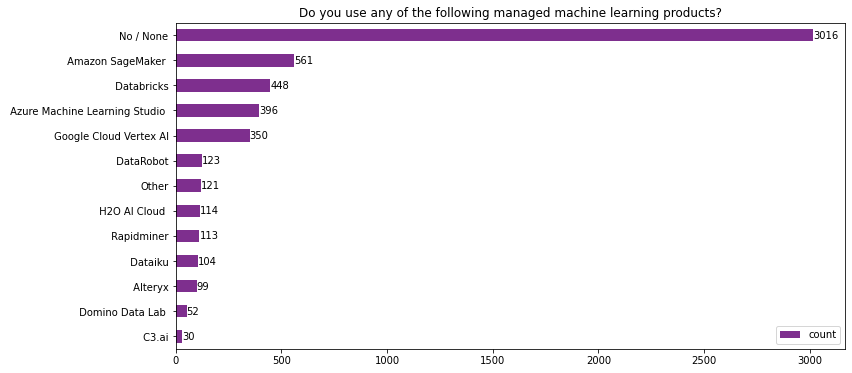

In [50]:
#Q37
data_vis_son("Q37_" ,'Do you use any of the following managed machine learning products?')

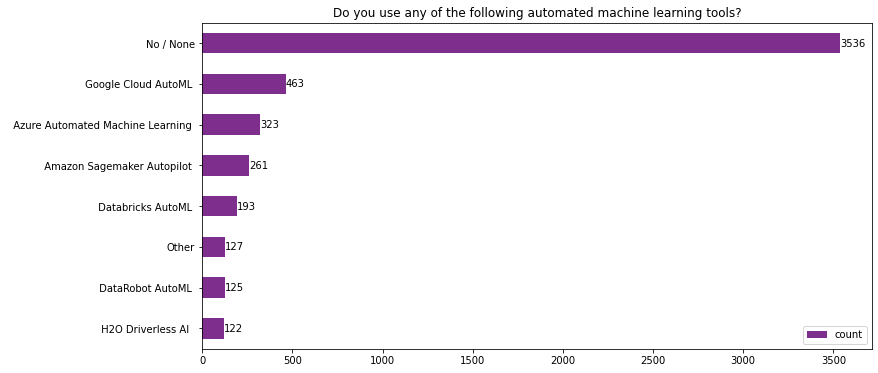

In [51]:
#Q38
data_vis_son("Q38_" ,'Do you use any of the following automated machine learning tools?')

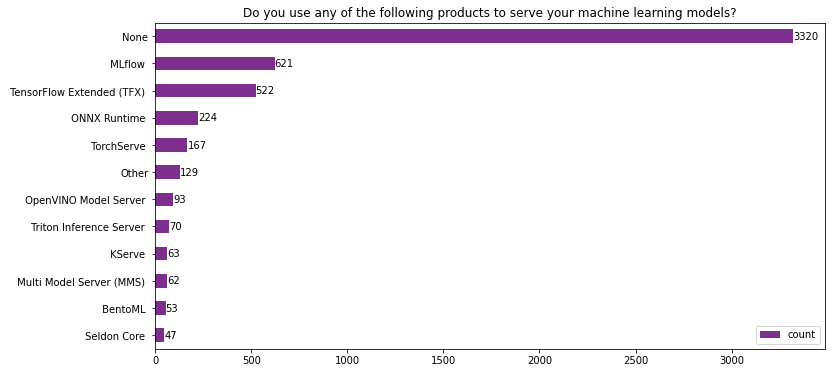

In [52]:
#Q39
data_vis_son("Q39_" ,'Do you use any of the following products to serve your machine learning models?')

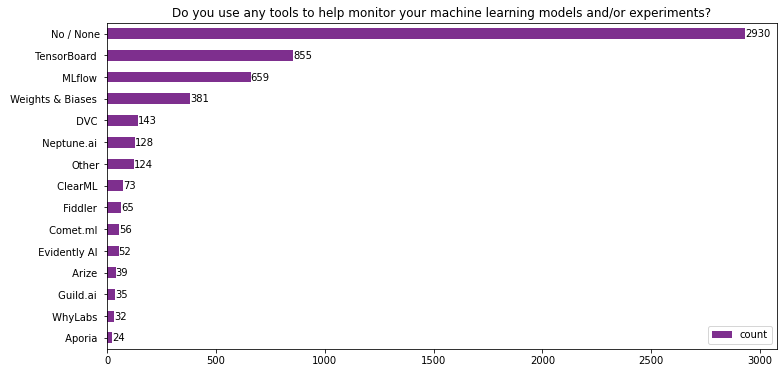

In [53]:
#Q40
data_vis_son("Q40_" ,'Do you use any tools to help monitor your machine learning models and/or experiments?')

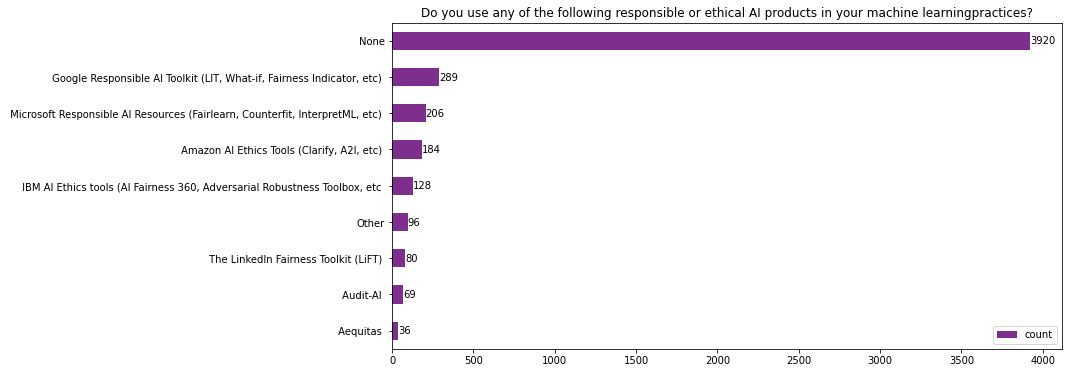

In [54]:
#Q41
data_vis_son("Q41_" ,'Do you use any of the following responsible or ethical AI products in your machine learningpractices?')

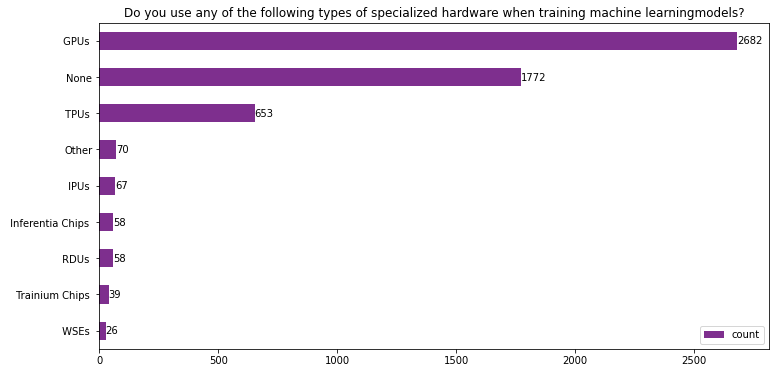

In [55]:
#Q42
data_vis_son("Q42_" ,'Do you use any of the following types of specialized hardware when training machine learningmodels?')

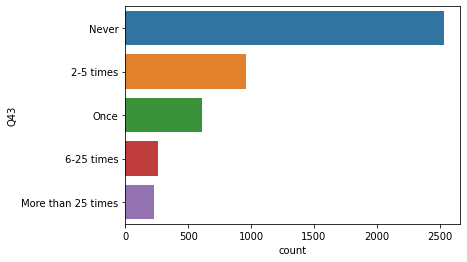

In [56]:
#Q43 Approximately how many times have you used a TPU (tensor processing unit)?
count_plot(df.Q43)
plt.xticks(rotation=0)
None

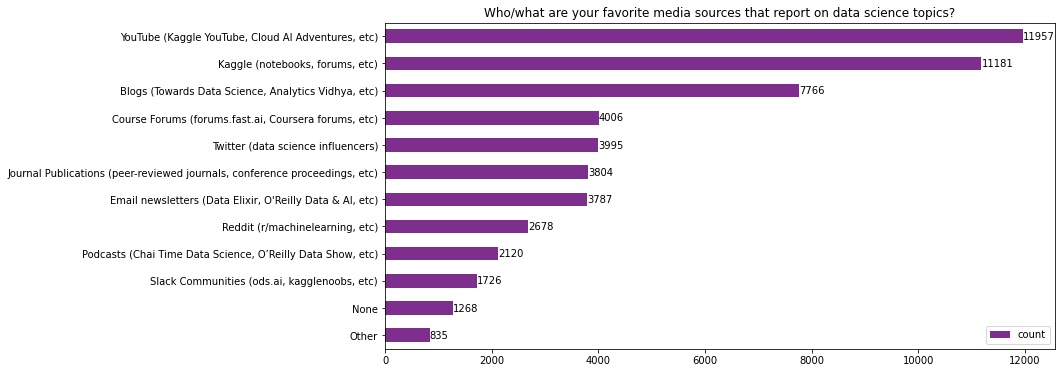

In [57]:
#Q44
data_vis_son("Q44_" ,'Who/what are your favorite media sources that report on data science topics?')

## Currently Salary Role

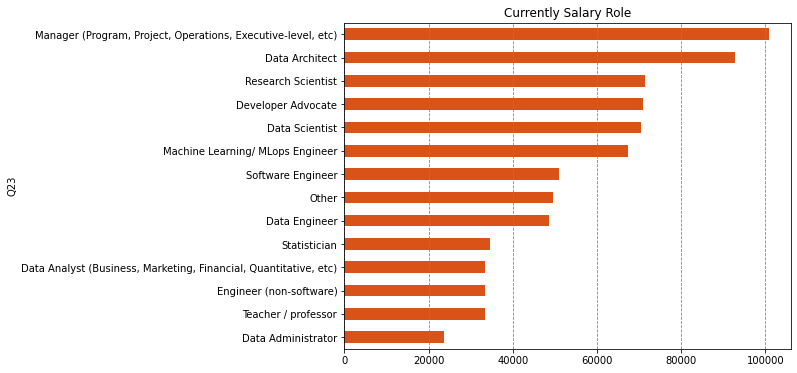

In [58]:
df_current_role=df[df['Q23'] != 'Currently not employed'].groupby(['Q23'])['Salary'].mean()
df_current_role.sort_values(inplace=True)
ax   = df_current_role.plot(kind='barh',color=[0.8500, 0.3250, 0.0980], figsize=(8,6) , title= 'Currently Salary Role')
ax.xaxis.grid(color='gray', linestyle='dashed')

## India Salary with Year Coding

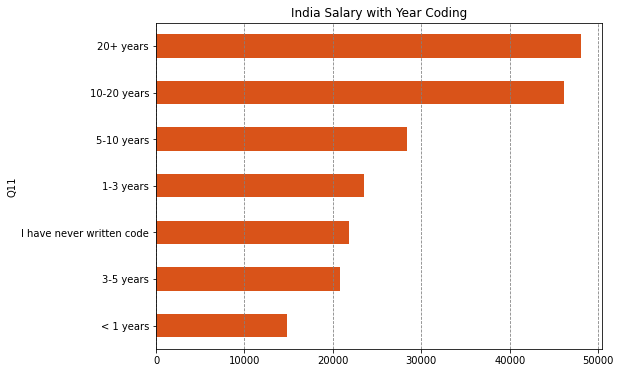

In [59]:
df_salary_india=df[df['Q4'] == 'India'].groupby(['Q11'])['Salary'].mean()
df_salary_india.sort_values(inplace=True)
ax   = df_salary_india.plot(kind='barh',color=[0.8500, 0.3250, 0.0980], figsize=(8,6) , title= 'India Salary with Year Coding')
ax.xaxis.grid(color='gray', linestyle='dashed')

## USA Salary with Year Coding

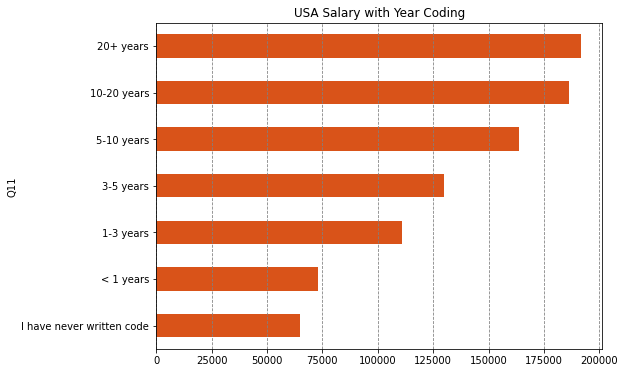

In [60]:
df_salary_usa=df[df['Q4'] == 'United States of America'].groupby(['Q11'])['Salary'].mean()
df_salary_usa.sort_values(inplace=True)
ax   = df_salary_usa.plot(kind='barh',color=[0.8500, 0.3250, 0.0980], figsize=(8,6) , title= 'USA Salary with Year Coding')
ax.xaxis.grid(color='gray', linestyle='dashed')